In [ ]:
## Week 2: Homework
# Question 1: Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.
# Question 2: Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity 
#     in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and
#     pedestrian counts for the selected year.
# Question 3: Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame 
#     to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

/tmp/ipykernel_282/2403931944.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour_beginning"] = pd.to_datetime(df["hour_beginning"], errors="coerce")


<Figure size 800x500 with 0 Axes>

<Axes: xlabel='Weekday'>

Text(0.5, 1.0, 'Brooklyn Bridge Pedestrian Counts by Weekday')

Text(0.5, 0, 'Weekday')

Text(0, 0.5, 'Total Pedestrian Count')

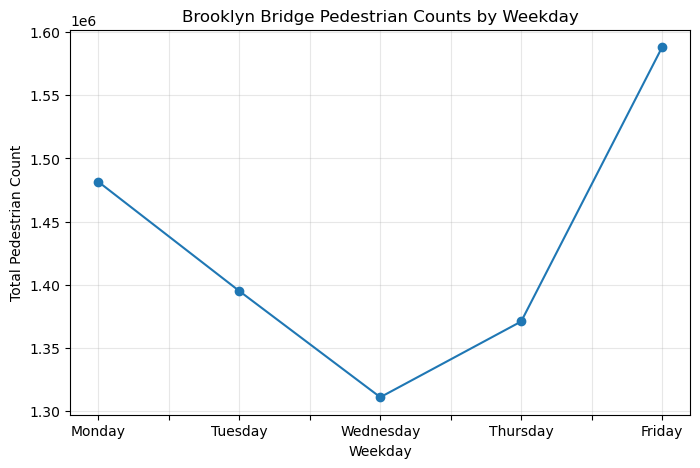

In [20]:
## Question 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load data
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

# Convert hour_beginning to datetime
df["hour_beginning"] = pd.to_datetime(df["hour_beginning"], errors="coerce")

# Create a pure Date column
df["Date"] = df["hour_beginning"].dt.date

# Weekday name
df["Weekday"] = df["hour_beginning"].dt.day_name()

# Keep only Monday–Friday
weekdays_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
df_weekdays = df[df["Weekday"].isin(weekdays_order)].copy()

# (Optional) If you ever had multiple locations, you could filter:
# df_weekdays = df_weekdays[df_weekdays["location"] == "Brooklyn Bridge"]

# Aggregate pedestrian counts by weekday (total over dataset)
weekday_counts = (
    df_weekdays
    .groupby("Weekday")["Pedestrians"]
    .sum()
    .reindex(weekdays_order)
)

# Plot
plt.figure(figsize=(8, 5))
weekday_counts.plot(marker="o")
plt.title("Brooklyn Bridge Pedestrian Counts by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Total Pedestrian Count")
plt.grid(True, alpha=0.3)
plt.show()

Average pedestrian counts by weather summary (2019):


weather_summary
partly-cloudy-day      1574.093627
clear-day              1382.183298
wind                    679.000000
cloudy                  543.225041
rain                    229.822076
snow                    222.631579
fog                     212.409091
sleet                   178.250000
partly-cloudy-night      52.765922
clear-night              33.233871
Name: Pedestrians, dtype: float64

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='weather_summary'>

Text(0, 0.5, 'Average Pedestrian Count')

Text(0.5, 1.0, 'Average Brooklyn Bridge Pedestrian Count by Weather (2019)')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'partly-cloudy-day'),
  Text(1, 0, 'clear-day'),
  Text(2, 0, 'wind'),
  Text(3, 0, 'cloudy'),
  Text(4, 0, 'rain'),
  Text(5, 0, 'snow'),
  Text(6, 0, 'fog'),
  Text(7, 0, 'sleet'),
  Text(8, 0, 'partly-cloudy-night'),
  Text(9, 0, 'clear-night')])

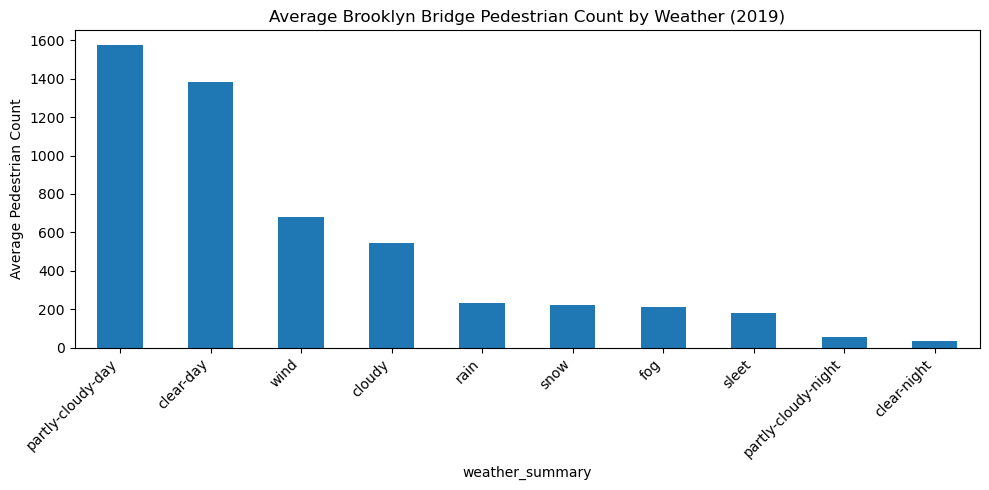

<Figure size 600x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation: Pedestrians vs Weather (2019)')

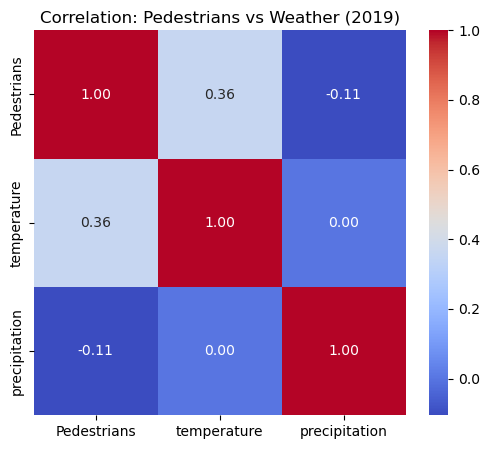

In [21]:
## Question 2
# Filter to year 2019
df_2019 = df[df["hour_beginning"].dt.year == 2019].copy()

# 1) Average pedestrian count by weather summary
weather_mean = (
    df_2019
    .groupby("weather_summary")["Pedestrians"]
    .mean()
    .sort_values(ascending=False)
)

print("Average pedestrian counts by weather summary (2019):")
weather_mean

# Bar plot of that
plt.figure(figsize=(10, 5))
weather_mean.plot(kind="bar")
plt.ylabel("Average Pedestrian Count")
plt.title("Average Brooklyn Bridge Pedestrian Count by Weather (2019)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 2) Correlation matrix between counts and numeric weather variables
corr_df = df_2019[["Pedestrians", "temperature", "precipitation"]].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation: Pedestrians vs Weather (2019)")
plt.show()

,hour_beginning,hour,time_of_day
0,2019-04-30 00:00:00,0,Night
1,2019-12-31 22:00:00,22,Night
2,2019-12-31 23:00:00,23,Night
3,2019-12-31 21:00:00,21,Night
4,2019-04-01 03:00:00,3,Night


<Figure size 700x500 with 0 Axes>

<Axes: xlabel='time_of_day'>

Text(0.5, 1.0, 'Average Brooklyn Bridge Pedestrian Count by Time of Day')

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Average Pedestrian Count')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

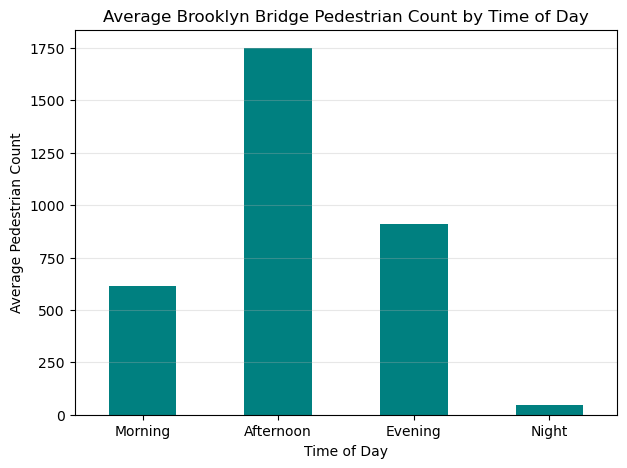

<Figure size 900x600 with 0 Axes>

<Axes: xlabel='time_of_day', ylabel='Weekday'>

Text(0.5, 1.0, 'Pedestrian Patterns by Weekday and Time of Day')

Text(83.22222222222221, 0.5, 'Weekday')

Text(0.5, 36.72222222222221, 'Time of Day')

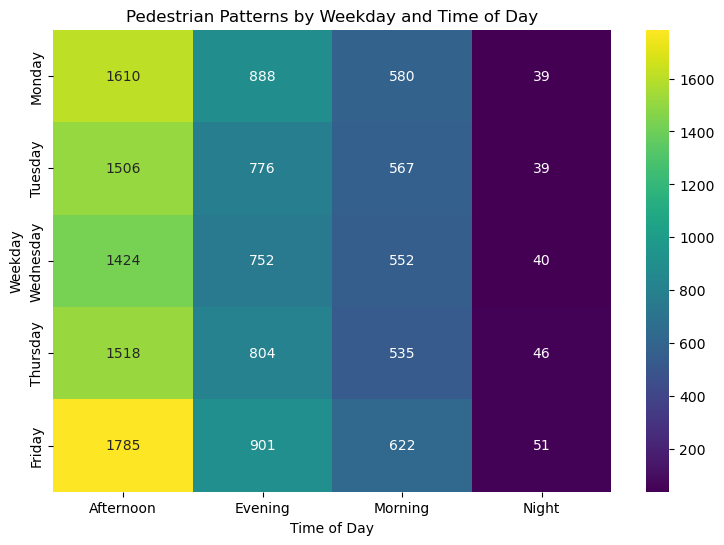

In [24]:
## Question 3
# Extract hour as integer
df["hour_beginning"] = pd.to_datetime(df["hour_beginning"], errors="coerce")
df["hour"] = df["hour_beginning"].dt.hour

# Custom function to categorize time of day
def categorize_time_of_day(h):
    if 6 <= h < 12:
        return "Morning"
    elif 12 <= h < 17:
        return "Afternoon"
    elif 17 <= h < 21:
        return "Evening"
    else:
        return "Night"

# Apply function
df["time_of_day"] = df["hour"].apply(categorize_time_of_day)

df[["hour_beginning", "hour", "time_of_day"]].head()

tod_order = ["Morning", "Afternoon", "Evening", "Night"]

tod_counts = (
    df.groupby("time_of_day")["Pedestrians"]
      .mean()
      .reindex(tod_order)
)

plt.figure(figsize=(7, 5))
tod_counts.plot(kind="bar", color="teal")
plt.title("Average Brooklyn Bridge Pedestrian Count by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Pedestrian Count")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.show()

pivot = (
    df.groupby(["Weekday", "time_of_day"])["Pedestrians"]
      .mean()
      .unstack("time_of_day")
      .reindex(weekdays_order)
)

plt.figure(figsize=(9, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="viridis")
plt.title("Pedestrian Patterns by Weekday and Time of Day")
plt.ylabel("Weekday")
plt.xlabel("Time of Day")
plt.show()